In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("UpdatedResumeDataSet.csv")

# Show basic info
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# Check data types and null values
print("\nInfo:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())


Shape of dataset: (962, 2)

First 5 rows:
       Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
None

Missing Values:
Category    0
Resume      0
dtype: int64


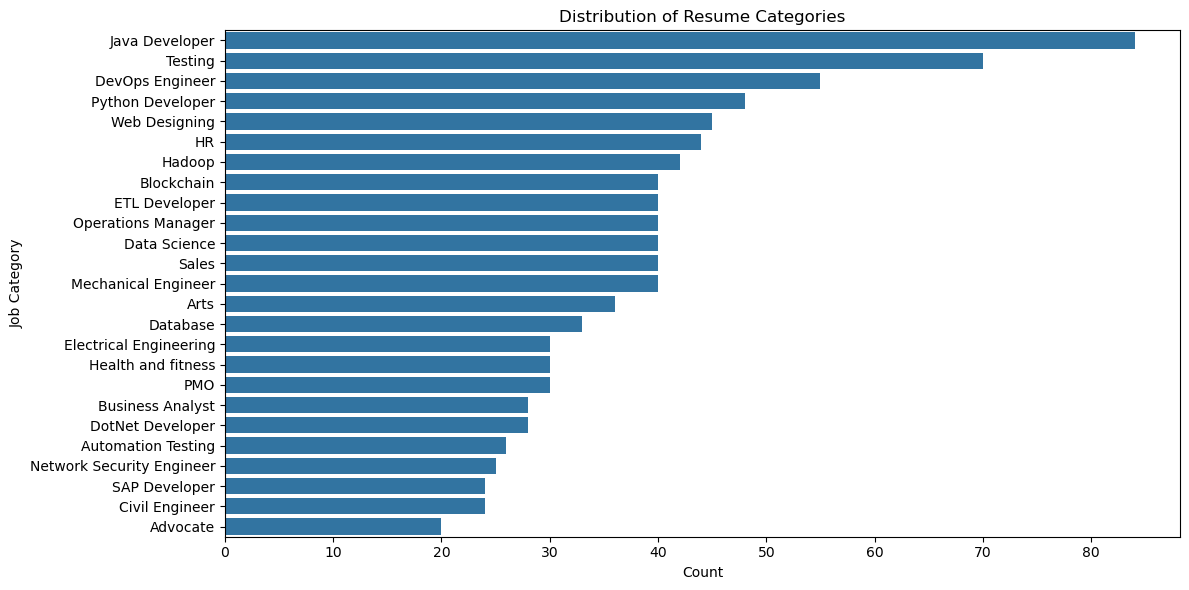

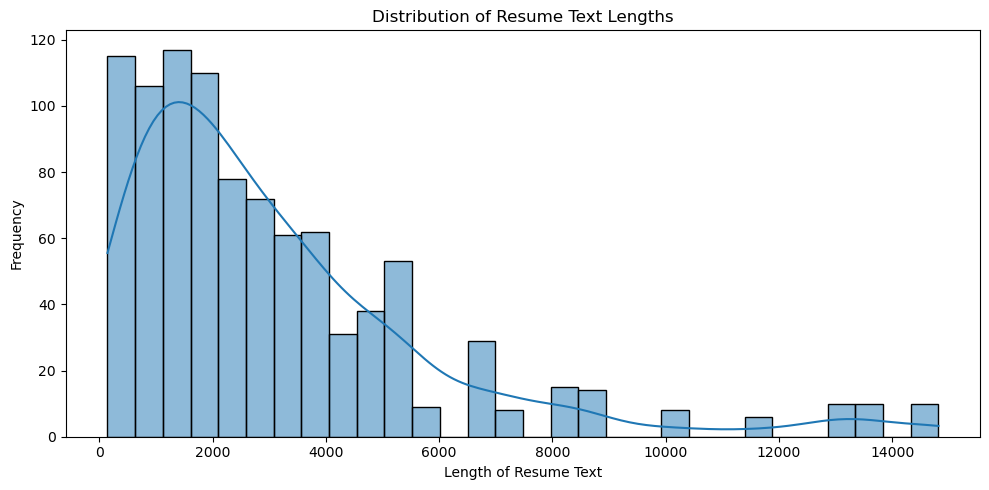

In [2]:
# Count of each category
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index)
plt.title("Distribution of Resume Categories")
plt.xlabel("Count")
plt.ylabel("Job Category")
plt.tight_layout()
plt.show()

# Length of resumes
df['resume_length'] = df['Resume'].apply(len)

# Plot histogram of resume lengths
plt.figure(figsize=(10,5))
sns.histplot(df['resume_length'], bins=30, kde=True)
plt.title("Distribution of Resume Text Lengths")
plt.xlabel("Length of Resume Text")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [3]:
# Display sample resumes from each category
categories = df['Category'].unique()

for category in categories:
    print(f"\nCategory: {category}")
    print(df[df['Category'] == category]['Resume'].iloc[0][:500])  # First 500 chars of first resume
    print("-" * 80)



Category: Data Science
Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib
--------------------------------------------------------------------------------

Category: HR
TECHNICAL SKILLS â¢ Typewriting â¢ TORA â¢ SPSSEducation Details 
January 2017 MBA  Chidambaram, Tamil Nadu SNS College of Engineering
January 2014 HSC   at SAV Higher Secondary School
 MBA   SNS College of Engineering
 SSLC Finance  at Kamaraj Matriculation School
HR 


Skill Details 
Human resource, Finance- Exprience - Less than 1 year monthsCompany Details 
company - 
de

In [4]:
    pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Define cleaning function
def clean_resume(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove special characters, numbers, punctuation
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)  # single chars
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    
    # Tokenization
    tokens = nltk.word_tokenize(text)
    
    # Stopwords and Lemmatization
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    cleaned = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    return ' '.join(cleaned)

# Apply to Resume column
df['cleaned_resume'] = df['Resume'].apply(clean_resume)

# Show before and after cleaning
print("\nOriginal Resume Snippet:\n", df['Resume'].iloc[0][:500])
print("\nCleaned Resume:\n", df['cleaned_resume'].iloc[0][:500])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anupb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anupb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anupb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Original Resume Snippet:
 Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib

Cleaned Resume:
 skill programming language python panda numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm naã bayes knn random forest decision tree boosting technique cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural net database visualization mysql sqlserver cassandra hbase elasticsearch j dc j plotly kibana matplotlib ggplot tableau

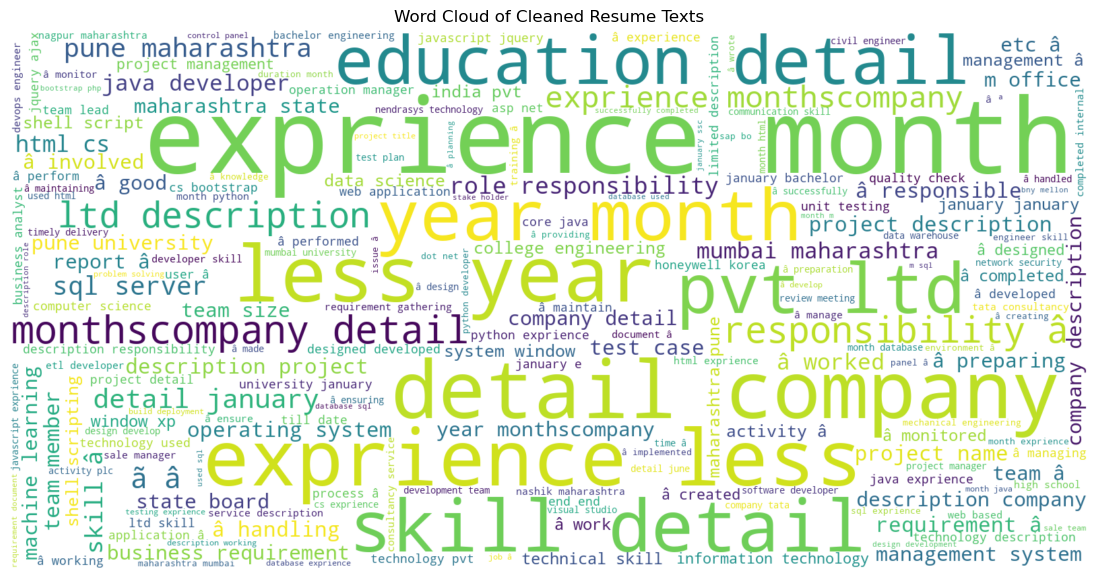

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['cleaned_resume'])

wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(text)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Cleaned Resume Texts")
plt.show()


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the vectorizer
tfidf = TfidfVectorizer(max_features=3000)  # You can adjust feature count

# Fit and transform the cleaned resumes
X = tfidf.fit_transform(df['cleaned_resume']).toarray()

# Encode the labels (categories)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['Category'])  # Convert text labels to numeric

# Show shape
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


Feature matrix shape: (962, 3000)
Label vector shape: (962,)


In [16]:
# View label encodings
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label mapping:\n", label_mapping)


Label mapping:
 {'Advocate': 0, 'Arts': 1, 'Automation Testing': 2, 'Blockchain': 3, 'Business Analyst': 4, 'Civil Engineer': 5, 'Data Science': 6, 'Database': 7, 'DevOps Engineer': 8, 'DotNet Developer': 9, 'ETL Developer': 10, 'Electrical Engineering': 11, 'HR': 12, 'Hadoop': 13, 'Health and fitness': 14, 'Java Developer': 15, 'Mechanical Engineer': 16, 'Network Security Engineer': 17, 'Operations Manager': 18, 'PMO': 19, 'Python Developer': 20, 'SAP Developer': 21, 'Sales': 22, 'Testing': 23, 'Web Designing': 24}


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC()
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n📘 Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"✅ Results for {name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))



📘 Training Logistic Regression...
✅ Results for Logistic Regression:
Accuracy: 0.9948186528497409
Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
      

In [20]:
from sklearn.metrics import accuracy_score

for name, model in models.items():
    print(f"\n📘 Evaluating Overfitting for {name}...")

    # Predict on training and test sets
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Calculate accuracies
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    print(f"🔵 Training Accuracy: {train_acc:.4f}")
    print(f"🟢 Test Accuracy:     {test_acc:.4f}")

    # Check for overfitting
    if train_acc - test_acc > 0.03:
        print("⚠️  Potential overfitting detected!")
    else:
        print("✅ No significant overfitting.")



📘 Evaluating Overfitting for Logistic Regression...
🔵 Training Accuracy: 0.9974
🟢 Test Accuracy:     0.9948
✅ No significant overfitting.

📘 Evaluating Overfitting for Random Forest...
🔵 Training Accuracy: 1.0000
🟢 Test Accuracy:     1.0000
✅ No significant overfitting.

📘 Evaluating Overfitting for SVM...
🔵 Training Accuracy: 1.0000
🟢 Test Accuracy:     0.9948
✅ No significant overfitting.



🔍 Evaluation for Logistic Regression...

📄 Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00     

C:\Users\anupb\AppData\Local\Temp\ipykernel_11056\1232229981.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\anupb\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


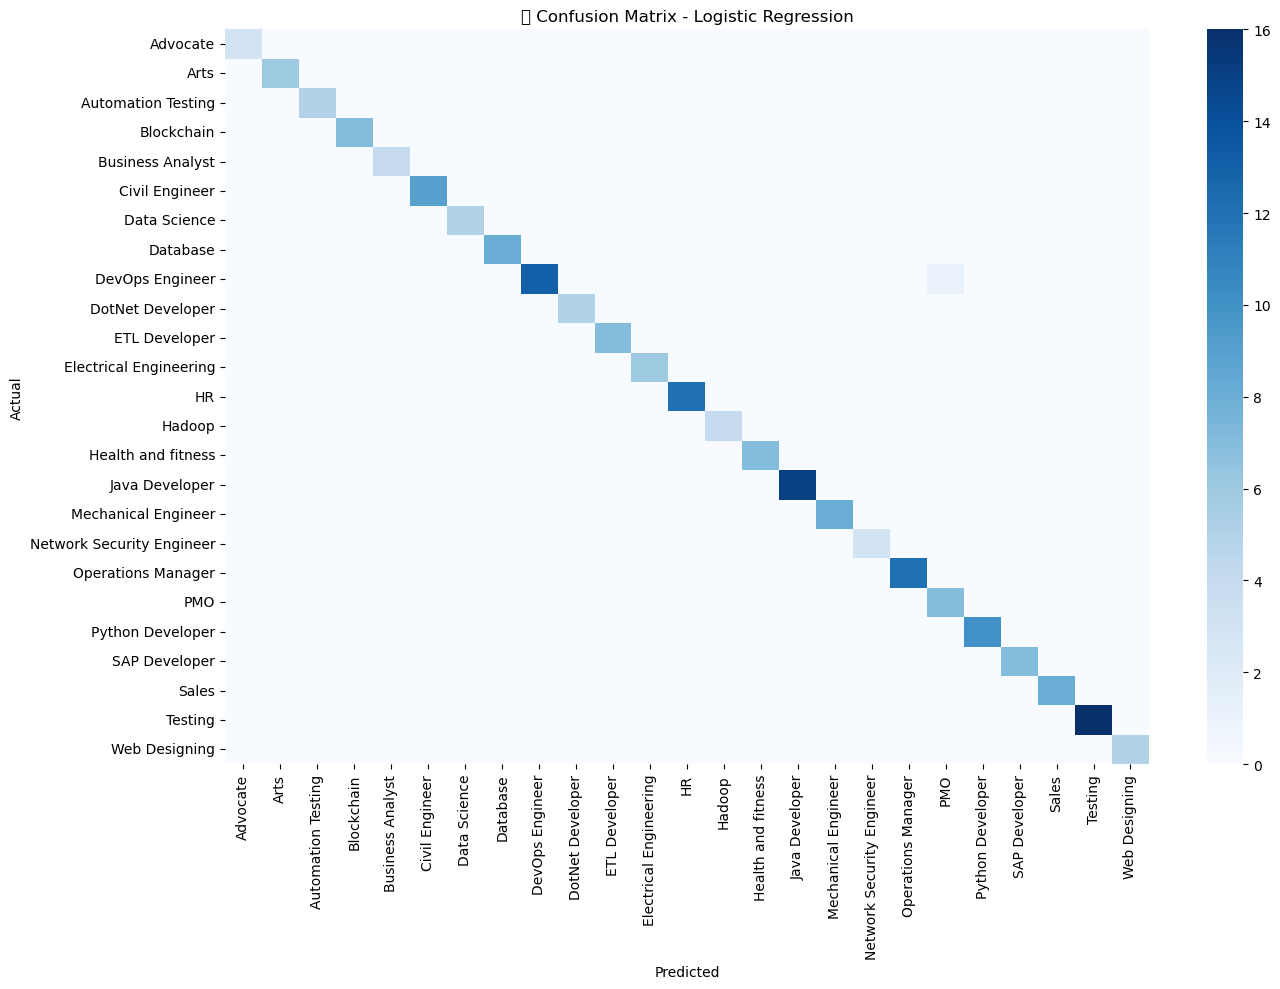


🔍 Evaluation for Random Forest...

📄 Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      1.00      1.00        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12


C:\Users\anupb\AppData\Local\Temp\ipykernel_11056\1232229981.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\anupb\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


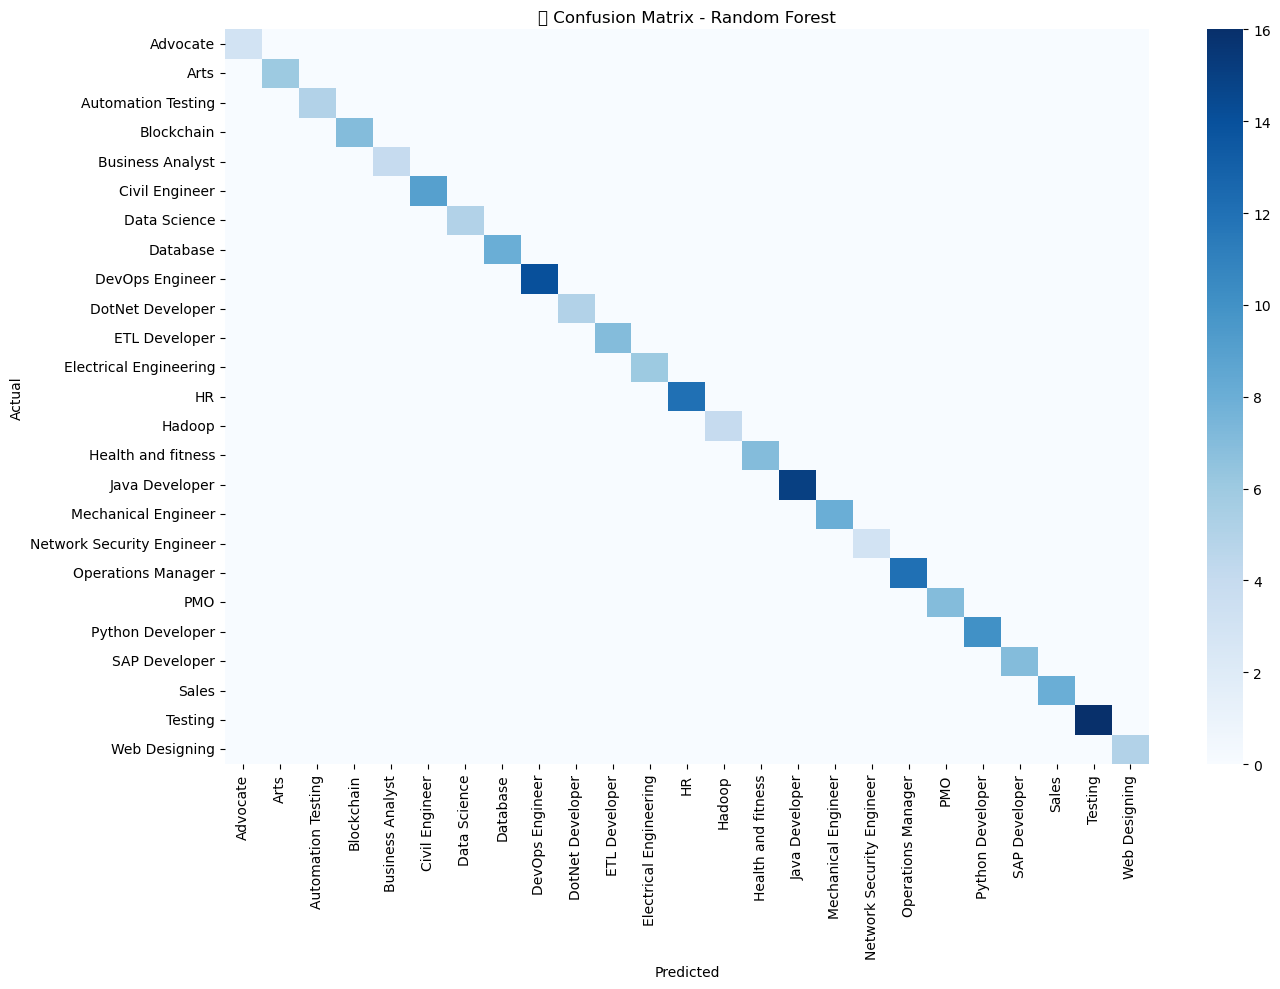


🔍 Evaluation for SVM...

📄 Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       0.80      1.00      0.89         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
          

C:\Users\anupb\AppData\Local\Temp\ipykernel_11056\1232229981.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\anupb\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


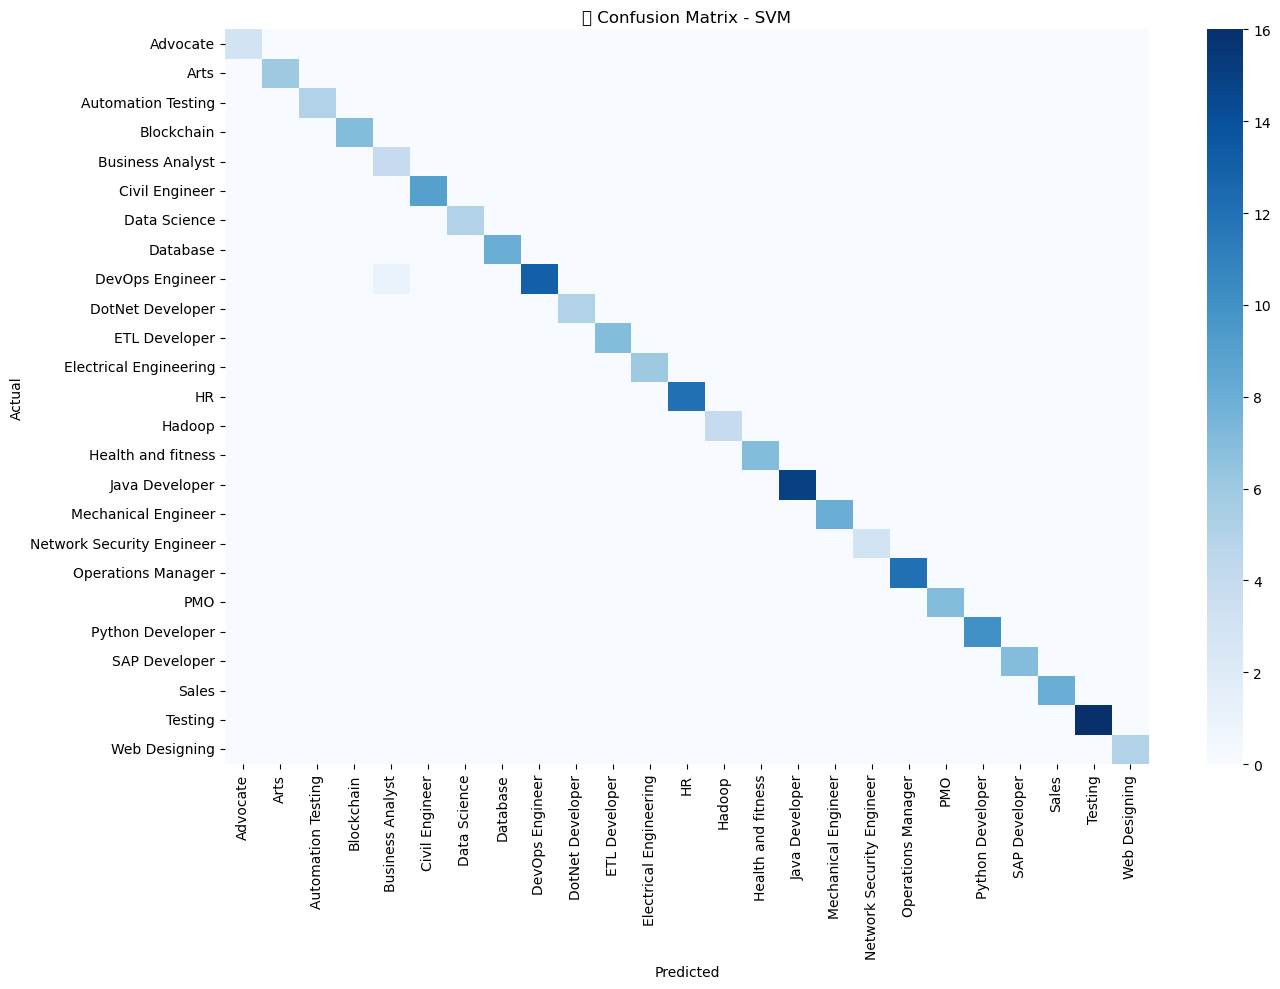

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def evaluate_model(name, model):
    print(f"\n🔍 Evaluation for {name}...")
    
    y_pred = model.predict(X_test)
    
    # Classification Report
    print("\n📄 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(14, 10))
    sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', 
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"📊 Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Evaluate each model
for name, model in models.items():
    evaluate_model(name, model)

In [28]:
import joblib

# Save the model
joblib.dump(models['Logistic Regression'], 'resume_classifier_logreg.joblib')

# Save the label encoder (so you can decode predictions later)
joblib.dump(le, 'label_encoder.joblib')
joblib.dump(tfidf, 'vectorizer.joblib')  # Save the trained vectorizer

print("✅ Logistic Regression model and label encoder saved.")


✅ Logistic Regression model and label encoder saved.


In [30]:
# Load the saved model and encoder
loaded_model = joblib.load('resume_classifier_logreg.joblib')
loaded_encoder = joblib.load('label_encoder.joblib')

# Example prediction
sample_vector = X_test[0].reshape(1, -1)
predicted_class = loaded_model.predict(sample_vector)
decoded_label = loaded_encoder.inverse_transform(predicted_class)

print("🧠 Predicted Job Category:", decoded_label[0])


🧠 Predicted Job Category: Java Developer
